In [1]:
import cv2
import zipfile 
import numpy as np

In [32]:
faces = {}

with zipfile.ZipFile('archive.zip') as facezip:
    for filename in facezip.namelist():
        if not filename.endswith('.pgm'):
            continue
        with facezip.open(filename) as image:
            #print(image.read())
            #print(np.frombuffer(image.read(),np.uint8))
            #print(cv2.imdecode(np.frombuffer(image.read(),np.uint8),cv2.IMREAD_GRAYSCALE))
            #print(cv2.imread(r'/Users/venkatasaiyaswanthbattu/Desktop/Eigen Faces Project/archive/'+filename,0))
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(),np.uint8),cv2.IMREAD_GRAYSCALE)

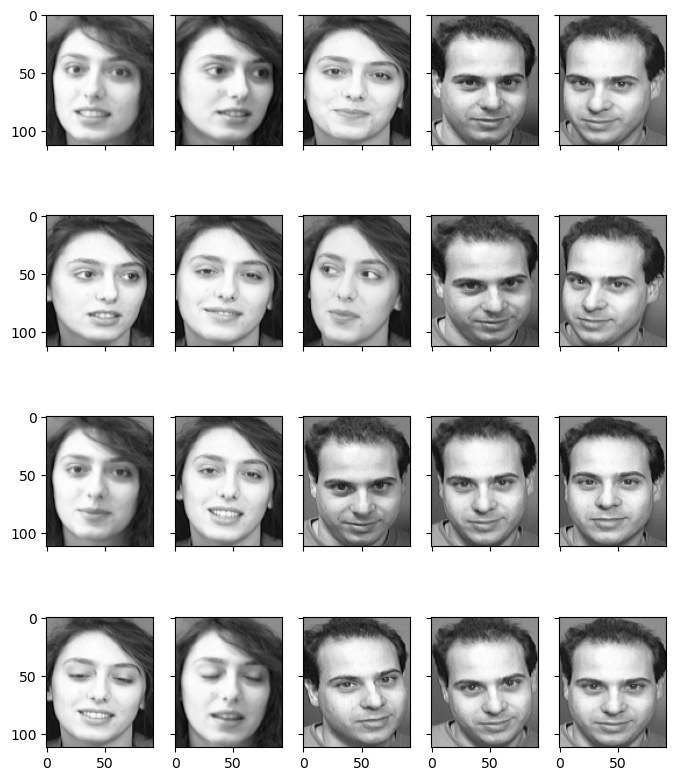

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4,5,sharex=True, sharey=True,figsize=(8,10))
facesimages = list(faces.values())[-20:]
for i in range(20):
    axes[i%4][i//4].imshow(facesimages[i],cmap='gray')

plt.show()

In [41]:
faceshape = list(faces.values())[0].shape
print("Shape of each Image as array: ",faceshape)

Shape of each Image as array:  (112, 92)


In [44]:
print("First 5 Keys: ",list(faces.keys())[:5])

First 5 Keys:  ['s1/1.pgm', 's1/10.pgm', 's1/2.pgm', 's1/3.pgm', 's1/4.pgm']


In [45]:
classes = set(filename.split('/')[0] for filename in faces.keys())
print("Total no. of classes: ",len(classes))
print("Total no of pictures: ",len(faces))

Total no. of classes:  40
Total no of pictures:  400


In [46]:
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith('s40/'):
        continue
    if key.startswith('s39/10'):
        continue 
    facematrix.append(val.flatten())
    facelabel.append(key.split('/')[0])

facematrix = np.array(facematrix)

In [61]:
print(facematrix)
print(len(facematrix[0]))

[[ 48  49  45 ...  47  46  46]
 [ 34  34  33 ...  37  40  33]
 [ 60  60  62 ...  32  34  34]
 ...
 [112 109 116 ...  93  88  92]
 [111 114 112 ...  88  86  92]
 [110 112 113 ...  92  87  90]]
10304


In [48]:
from sklearn.decomposition import PCA 

pca = PCA().fit(facematrix)

In [63]:
print("Eigen Vectors: ",pca.components_[:5])
print(len(pca.components_[0]))
print(len(pca.components_))

Eigen Vectors:  [[-0.0031385  -0.00311511 -0.00314579 ... -0.00669021 -0.00603985
  -0.0070422 ]
 [-0.01397458 -0.01391675 -0.01393117 ...  0.01147549  0.0105211
   0.00969744]
 [-0.01949678 -0.01966094 -0.01940504 ... -0.01571058 -0.01589665
  -0.01636496]
 [-0.01412545 -0.01423794 -0.01425702 ...  0.01219798  0.01139316
   0.0112209 ]
 [ 0.00033077  0.0003509   0.0004544  ... -0.0012822  -0.00030677
  -0.00041436]]
10304
389


In [53]:
print("Eigen Values: ",pca.explained_variance_ratio_)

Eigen Values:  [1.77824822e-01 1.29057925e-01 6.67093882e-02 5.63561346e-02
 5.13040312e-02 3.39156477e-02 2.47893586e-02 2.27967054e-02
 1.95632067e-02 1.82678428e-02 1.45655853e-02 1.38626271e-02
 1.13318896e-02 1.07267786e-02 9.68365599e-03 9.17860717e-03
 8.60995215e-03 8.21053028e-03 7.36580634e-03 7.01112888e-03
 6.69450840e-03 6.40327943e-03 5.98295099e-03 5.49298705e-03
 5.36083980e-03 4.99408106e-03 4.84854321e-03 4.77687371e-03
 4.50099203e-03 4.35061143e-03 4.27684434e-03 4.05463914e-03
 3.96785012e-03 3.83241704e-03 3.69966355e-03 3.56356652e-03
 3.41269732e-03 3.33215240e-03 3.17642634e-03 3.03400142e-03
 2.97464206e-03 2.91054493e-03 2.86082016e-03 2.78052126e-03
 2.69873388e-03 2.60122139e-03 2.56106677e-03 2.50435737e-03
 2.44154438e-03 2.35425118e-03 2.31772334e-03 2.20335201e-03
 2.18249599e-03 2.16369451e-03 2.11113501e-03 2.05410950e-03
 2.00521036e-03 1.97423272e-03 1.95619744e-03 1.92361114e-03
 1.88146543e-03 1.81655157e-03 1.74212750e-03 1.70581678e-03
 1.664055

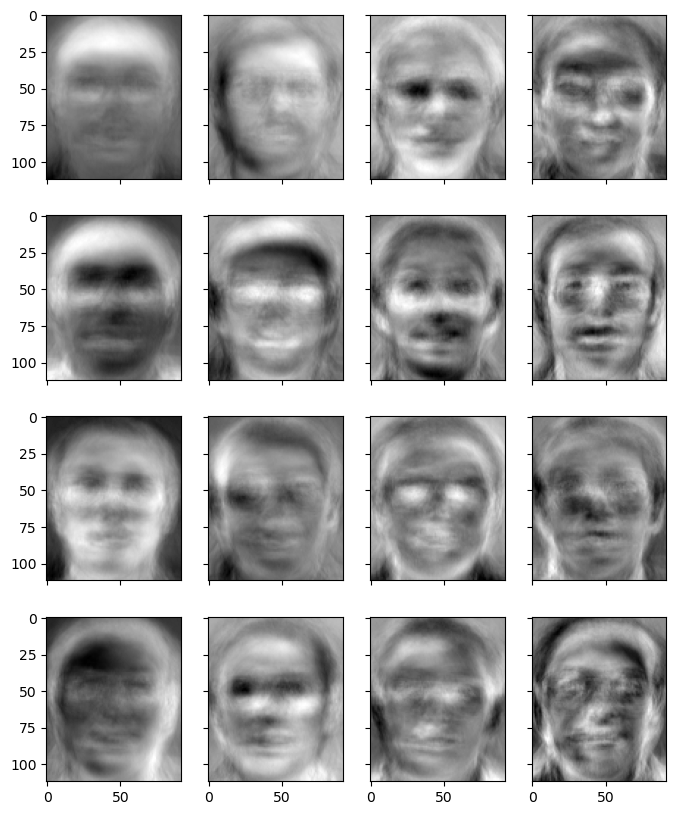

In [54]:
n_components = 50 
eigenfaces = pca.components_[:n_components] # eigen vectors

fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape),cmap='gray')
plt.show()

In [64]:
weights = eigenfaces @ (facematrix - pca.mean_).T

In [68]:
print(weights)
print(len(weights))
print(len(weights[0]))


[[ 1511.48535017  2597.88183054  2953.26320132 ...  -927.15700457
   -819.38967273 -1339.26114916]
 [-1232.86110703 -1127.89904456  -955.03456257 ... -1002.13458397
  -1549.78240571 -1618.91616856]
 [ 1769.97865116   721.54563853  -653.71549028 ...  -902.22666737
   -487.72112891  -449.27986635]
 ...
 [ -251.5732153   -259.17783366   264.06537101 ...  -138.97324974
   -276.72898862  -117.63430902]
 [ -125.69294117    39.87298856    84.9869098  ...   194.26430432
     69.72315268   295.55525873]
 [    5.87542544  -163.11206295  -303.60175584 ...   -91.12910151
    -84.96728567  -199.93878707]]
50
389


Best match s39 with Euclidean distance 1559.997137


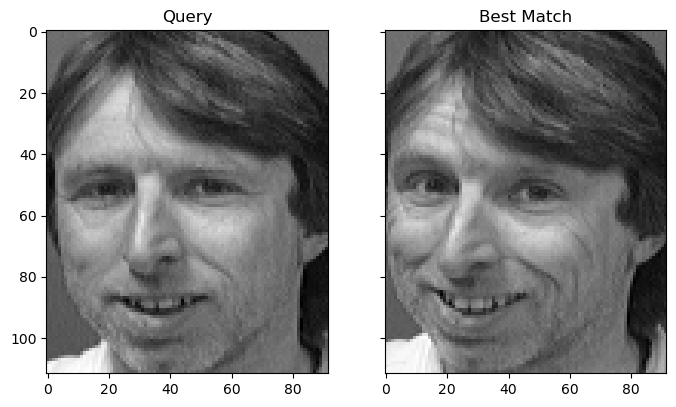

In [71]:
query = faces['s39/10.pgm'].reshape(1,-1)
query_weight = eigenfaces @ (query-pca.mean_).T
euclidean_distance = np.linalg.norm(weights-query_weight,axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f"%(facelabel[best_match],euclidean_distance[best_match]))

fig,axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape),cmap='gray')
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape),cmap='gray')
axes[1].set_title("Best Match")
plt.show()

Best match s5 with Euclidean distance 2690.209330


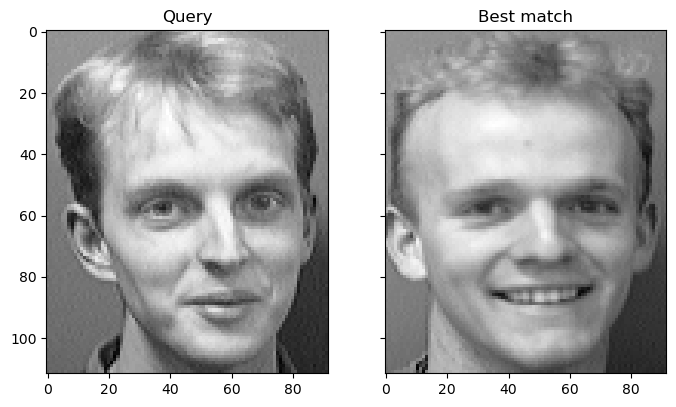

In [70]:
query = faces["s40/1.pgm"].reshape(1, -1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" %
      (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()


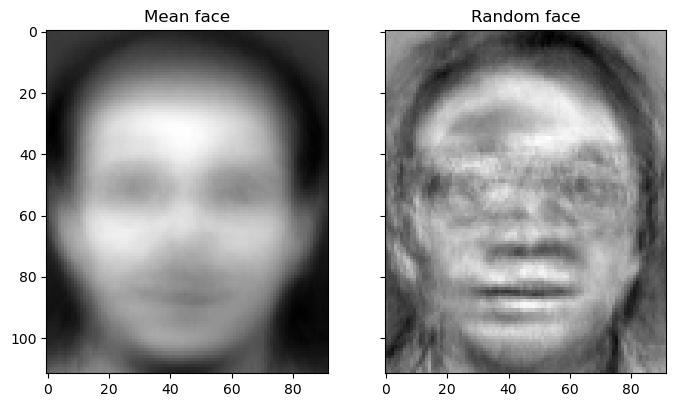

In [72]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 6))
axes[0].imshow(pca.mean_.reshape(faceshape), cmap="gray")
axes[0].set_title("Mean face")
random_weights = np.random.randn(n_components) * weights.std()
newface = random_weights @ eigenfaces + pca.mean_
axes[1].imshow(newface.reshape(faceshape), cmap="gray")
axes[1].set_title("Random face")
plt.show()
